# Partícula libre

In [17]:
import openmm as mm
from openmm import unit
from openmm import app
import numpy as np
from matplotlib import pyplot as plt

## Creamos el sistema

In [2]:
molsys = mm.System()

In [3]:
molsys.addParticle(39.948 * unit.amu) # masa del átomo de argón

0

In [4]:
molsys.getNumParticles()

1

## Estado termodinámico

In [5]:
# Formalismo NVT
temperature = 300*unit.kelvin
pressure    = None

## Parametros de la simulación

In [6]:
integration_timestep = 0.001*unit.picoseconds
saving_timestep = 0.1*unit.picoseconds
simulation_time = 10*unit.picoseconds

saving_steps = int(saving_timestep/integration_timestep)
num_saving_steps = int(simulation_time/saving_timestep)

## Integrador

In [7]:
friction   = 5.0/unit.picosecond
integrator = mm.LangevinIntegrator(temperature, friction, integration_timestep)

## Plataforma

In [8]:
platform = mm.Platform.getPlatformByName('CUDA')

## Reporteros

In [9]:
times = np.zeros(num_saving_steps, np.float32) * unit.picoseconds
positions  = np.zeros([num_saving_steps,3], np.float32) * unit.angstroms
velocities = np.zeros([num_saving_steps,3], np.float32) * unit.angstroms/unit.picosecond
potential_energies   = np.zeros([num_saving_steps], np.float32) * unit.kilocalories_per_mole
kinetic_energies     = np.zeros([num_saving_steps], np.float32) * unit.kilocalories_per_mole

## Condiciones iniciales

In [10]:
initial_positions  = [[0.0, 0.0, 0.0]] * unit.angstroms

## Creamos el contexto

In [11]:
context = mm.Context(molsys, integrator, platform)

In [12]:
context.setPositions(initial_positions)

In [13]:
context.setVelocitiesToTemperature(temperature)

## Llenamos los reporteros para el paso 0

In [14]:
state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)

In [15]:
times[0] =  state.getTime()
positions[0] = state.getPositions()[0]
velocities[0] = state.getVelocities()[0]
kinetic_energies[0]=state.getKineticEnergy()
potential_energies[0]=state.getPotentialEnergy()

## Corriendo la simulación

In [16]:
for ii in range(num_saving_steps):
    context.getIntegrator().step(saving_steps)
    state_xx = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
    times[ii] = state_xx.getTime()
    positions[ii] = state_xx.getPositions()[0]
    velocities[ii] = state_xx.getVelocities()[0]
    kinetic_energies[ii]=state_xx.getKineticEnergy()
    potential_energies[ii]=state_xx.getPotentialEnergy()
    print('Paso',ii,'con tiempo', state_xx.getTime())

Paso 0 con tiempo 0.10000000000000007 ps
Paso 1 con tiempo 0.20000000000000015 ps
Paso 2 con tiempo 0.3000000000000002 ps
Paso 3 con tiempo 0.4000000000000003 ps
Paso 4 con tiempo 0.5000000000000003 ps
Paso 5 con tiempo 0.6000000000000004 ps
Paso 6 con tiempo 0.7000000000000005 ps
Paso 7 con tiempo 0.8000000000000006 ps
Paso 8 con tiempo 0.9000000000000007 ps
Paso 9 con tiempo 1.0000000000000007 ps
Paso 10 con tiempo 1.0999999999999897 ps
Paso 11 con tiempo 1.1999999999999786 ps
Paso 12 con tiempo 1.2999999999999676 ps
Paso 13 con tiempo 1.3999999999999566 ps
Paso 14 con tiempo 1.4999999999999456 ps
Paso 15 con tiempo 1.5999999999999346 ps
Paso 16 con tiempo 1.6999999999999236 ps
Paso 17 con tiempo 1.7999999999999126 ps
Paso 18 con tiempo 1.8999999999999015 ps
Paso 19 con tiempo 1.9999999999998905 ps
Paso 20 con tiempo 2.0999999999998797 ps
Paso 21 con tiempo 2.1999999999998687 ps
Paso 22 con tiempo 2.2999999999998577 ps
Paso 23 con tiempo 2.3999999999998467 ps
Paso 24 con tiempo 2.499

## Representamos los datos de la simulación

### Trayectoria

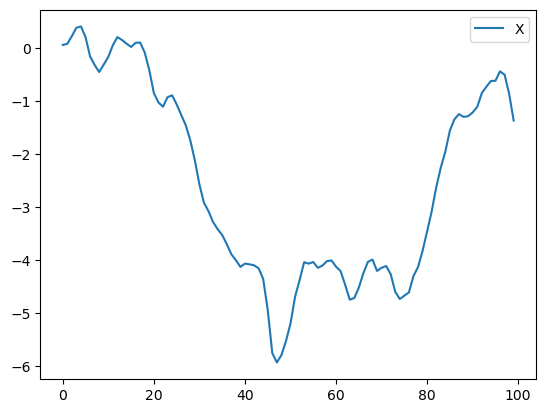

In [19]:
plt.plot(positions[:,0], label='X')
plt.legend()
plt.show()

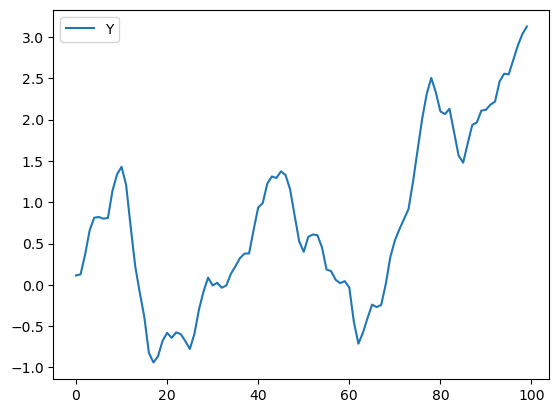

In [21]:
plt.plot(positions[:,1], label='Y')
plt.legend()
plt.show()

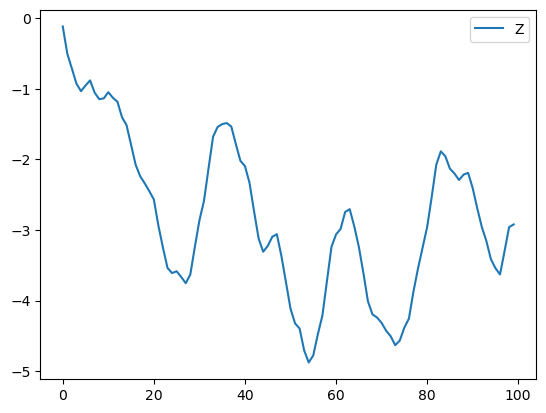

In [23]:
plt.plot(positions[:,2], label='Z')
plt.legend()
plt.show()

### En otro notebook... y con este como base:

- Grafica de energía cinética en función del tiempo.
- Gráfica de temperatura en función del tiempo.
- Energía cinética promedio, energía potencial promedio, temperatura promedio.
- Calcular la constante de difusión de la partícula.